In [98]:
source_path = '../data/OpenEphys_data/2019-06-25_09-24-03/'
chan_index = 5

In [99]:
import OpenEphys
from kaveh.toolbox import common_avg_ref, butter_bandpass_filter
import Kwik
from matplotlib import pyplot as plt
import numpy as np
import os
import re
import scipy.signal
import csv
from matplotlib import style
style.use('bmh')
COLOR = 'gray'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [100]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
messages_fname = os.path.join(source_path, 'messages.events')
events_fname = os.path.join(source_path, 'all_channels.events')

with open(messages_fname, 'r') as f:
    file_content = f.readlines()
Fs = float(file_content[1].split('@')[-1][0:-3])
time0 = int(file_content[1].split(' ')[0])
net_events = np.array([[l.split(' ')[0], l.split(' ')[1]] for l in file_content if len(l.split(' ')) == 2])
to_delete = [i for i, l in enumerate(net_events) if l[1] == '\n']
net_events = np.delete(net_events, to_delete, axis = 0).astype(np.int)
net_events[:,0] = net_events[:,0] - time0
directions, counts = np.unique(net_events[:,1], return_counts=True)

In [102]:
print(Fs)

30000.0


In [103]:
f_name_csv = os.path.join(source_path, 'channel_{}.CS.csv'.format(chan_index))
with open(f_name_csv, 'r') as csv_f:
    reader = csv.reader(csv_f)
    cs_indices = np.squeeze(np.array(list(reader), dtype=np.int64))

In [104]:
cs_counts = []
cs_range = 0.200*Fs
for d in directions:
    d_indices = net_events[np.where(net_events[:,1] == d), 0][0]
    cs_count = 0
    for di in d_indices:
        cs_count = cs_count + np.count_nonzero(np.where(np.logical_and(cs_indices < di + cs_range, cs_indices > di)))
    cs_counts.append(cs_count)
cs_probs = [csc*1.0/counts[i] for i, csc in enumerate(cs_counts) ]

<IPython.core.display.Javascript object>


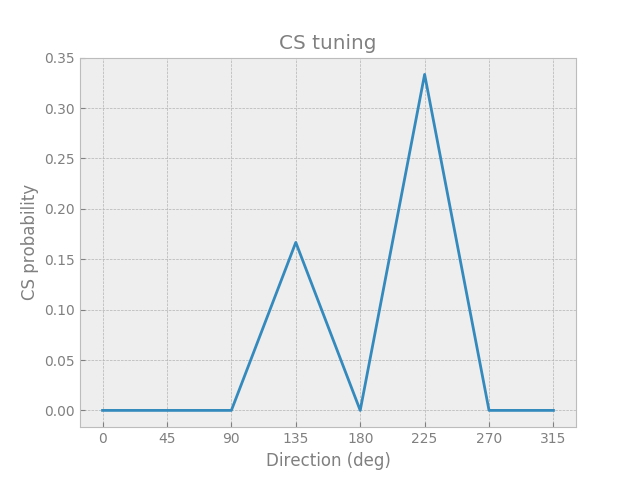

Text(0.5,1,u'CS tuning')

In [105]:
plt.figure()
plt.plot(directions, cs_probs)
plt.xticks(directions, directions)
plt.xlabel('Direction (deg)')
plt.ylabel('CS probability')
plt.title('CS tuning')

In [67]:
directions

array([  0,  45,  90, 135, 180, 225, 270, 315])